# AV_Jobathon_Employee_Attrition

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [89]:
df=pd.read_csv('train_MpHjUjU.csv')
df.head(20)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1
6,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1
7,2017-02-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1
8,2017-03-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,350000,1
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1


## EDA and Preprocessing

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 1.9+ MB


In [91]:
df.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
Emp_ID,19104.0,1415.591133,8.107053e+02,1.0,36.00,298.0,710.0,1417.0,2137.0,2536.0,2758.0,2788.0
Age,19104.0,34.650283,6.264471e+00,21.0,23.00,27.0,30.0,34.0,39.0,43.0,51.0,58.0
Salary,19104.0,65652.025126,3.091452e+04,10747.0,15864.27,29181.0,42383.0,60087.0,83969.0,110490.0,145861.0,188418.0
Joining Designation,19104.0,1.690536,8.369837e-01,1.0,1.00,1.0,1.0,1.0,2.0,3.0,4.0,5.0
Designation,19104.0,2.252670,1.026512e+00,1.0,1.00,1.0,1.0,2.0,3.0,4.0,5.0,5.0
Total Business Value,19104.0,571662.074958,1.128312e+06,-6000000.0,0.00,0.0,0.0,250000.0,699700.0,1395676.0,5188800.3,33747720.0
Quarterly Rating,19104.0,2.008899,1.009832e+00,1.0,1.00,1.0,1.0,2.0,3.0,4.0,4.0,4.0


### Converting date features to datetime datatype

In [92]:
df['MMM-YY']=df['MMM-YY'].astype('datetime64')
df['Dateofjoining']=df['Dateofjoining'].astype('datetime64')

### Calculating Experience for every entry interms of days

In [93]:
df['Exp']=df['MMM-YY']-df['Dateofjoining']
df['Exp']=df['Exp'].apply(lambda x:int(str(x).split(' ')[0]))

In [94]:
df.head(20)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Exp
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,8
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,39
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,68
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,-5
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,25
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1,-6
6,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1,25
7,2017-02-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1,56
8,2017-03-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,350000,1,84
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1,115


### Defining Dependent variable

By considering,
- If people have less than 90 days of experience have more chances of leaving.
- If LastWorkingDate is mentioned, it means that they have already left the company.   
Accordingly target variable is defined as 0 (Not leaving) and 1(leaving) values are assigned.

In [95]:
df['Target']=np.where(df['Exp']>=90,0,1)
df['Target'][~df['LastWorkingDate'].isnull()]=1
df.head(30)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Exp,Target
0,2016-01-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,2381060,2,8,1
1,2016-02-01,1,28,Male,C23,Master,57387,2015-12-24,NaN,1,1,-665480,2,39,1
2,2016-03-01,1,28,Male,C23,Master,57387,2015-12-24,2016-03-11,1,1,0,2,68,1
3,2017-11-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,-5,1
4,2017-12-01,2,31,Male,C7,Master,67016,2017-11-06,NaN,2,2,0,1,25,1
5,2016-12-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1,-6,1
6,2017-01-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1,25,1
7,2017-02-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,0,1,56,1
8,2017-03-01,4,43,Male,C13,Master,65603,2016-12-07,NaN,2,2,350000,1,84,1
9,2017-04-01,4,43,Male,C13,Master,65603,2016-12-07,2017-04-27,2,2,0,1,115,1


### Target variable counts

In [96]:
df.Target.value_counts()

0    13022
1     6082
Name: Target, dtype: int64

### Test data

In [123]:
test_df=pd.read_csv('test_hXY9mYw.csv')
test_emp=test_df.iloc[:,0].values
test_emp

array([ 394,  173, 1090,  840,  308, 1864, 1606,  954, 2422, 1841, 1484,
       2727, 1031, 2137, 2568, 1745, 2668, 2617, 2070, 1446, 1043, 2561,
        945, 2517, 1039, 2594,  115,  870,  329,  973, 1892, 2740, 1093,
        693, 1817, 1753, 2420, 1655, 1573, 2365, 1623, 2625, 1335,  450,
       2087, 2576, 2771, 1549, 1657, 1957, 1662, 1588, 2615, 2027, 2714,
        556,  377,  605,  791, 1147,   68, 2784, 1181, 1782, 2299, 1238,
        402, 1109,  990,  425,  569, 2454,  926,  391, 2110, 1875,  117,
       1714, 1106,  422,  150, 2179, 2684,  762,  718, 1694, 1051, 2104,
       1225,   63,  275, 1733, 2541,  140, 1037,  407, 1770,  946,  604,
        893, 2200, 2114, 1243, 2076, 2597,   60,  662,  765,  199, 1526,
       1486, 1179, 1161, 2259, 1191, 1811, 1510,  434, 1918,  753,   25,
       1414, 1426,  716, 2283, 1840, 1678, 1859, 2381, 2008, 1050,  581,
       2289,  713, 1924, 2257, 1504, 1670, 2551, 1874,   26, 2308, 1259,
         77,  568, 1370,  704, 2494, 1077,  592, 23

### Dropping unwanted features

In [98]:
df=df.drop(['MMM-YY','Dateofjoining','LastWorkingDate','Exp'],axis=1)
df.head()

,Emp_ID,Age,Gender,City,Education_Level,Salary,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
0,1,28,Male,C23,Master,57387,1,1,2381060,2,1
1,1,28,Male,C23,Master,57387,1,1,-665480,2,1
2,1,28,Male,C23,Master,57387,1,1,0,2,1
3,2,31,Male,C7,Master,67016,2,2,0,1,1
4,2,31,Male,C7,Master,67016,2,2,0,1,1


### Differentiating numerical and categorical features

In [99]:
df_num=df.select_dtypes('number')
df_char=df.select_dtypes('object')

### Value counts of each numerical features.

In [100]:
def unique_level(X):
    X=X.value_counts().count()
    return(X)
df_num.apply(lambda x:unique_level(x))

Emp_ID                   2381
Age                        36
Salary                   2383
Joining Designation         5
Designation                 5
Total Business Value    10181
Quarterly Rating            4
Target                      2
dtype: int64

Since Joining Designation, Designation, Quarterly Rating and Target have less than 10 values, can be considered as categorical features.

In [101]:
df_cat=df_num[['Joining Designation','Designation','Quarterly Rating','Target']]
df_num=df_num.drop(['Joining Designation','Designation','Quarterly Rating','Target'],axis=1)
df_cat.head()

,Joining Designation,Designation,Quarterly Rating,Target
0,1,1,2,1
1,1,1,2,1
2,1,1,2,1
3,2,2,1,1
4,2,2,1,1


### Bi-variate analysis for categorical variables

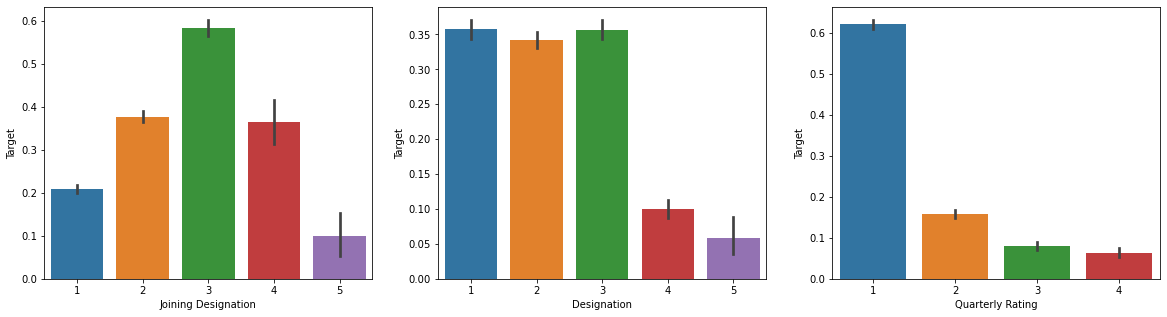

In [102]:
plt.figure(figsize=(20,5))
for i,col in enumerate(df_cat.columns[:-1],1):
    plt.subplot(1,3,i)
    sns.barplot(df_cat[col],df_cat['Target'])  

- There is significant slope change w.r.t values in each feature, so these features influences significantly to the target feature.

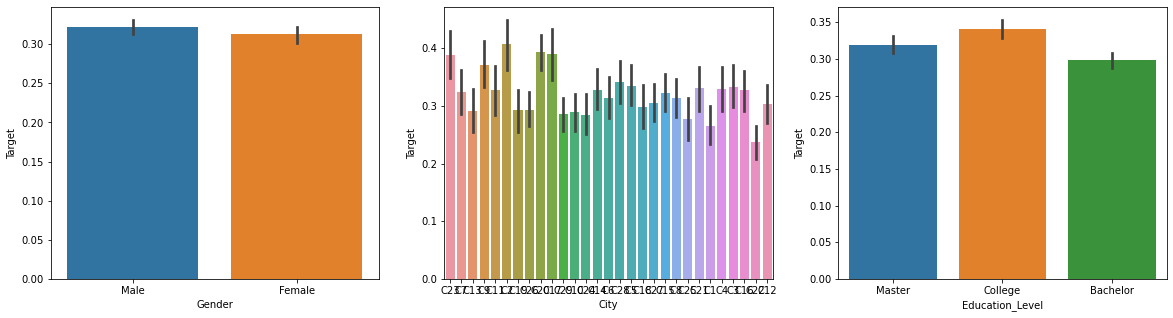

In [103]:
plt.figure(figsize=(20,5))
for i,col in enumerate(df_char.columns):
    plt.subplot(1,3,i+1)
    sns.barplot(df_char[col],df['Target'])  

- Only city feature has change in slopes, which will have influence to target feature.
- Gender and Education_Level might no affect much towards target.(could be dropped.) 

In [104]:
df_num.head()

,Emp_ID,Age,Salary,Total Business Value
0,1,28,57387,2381060
1,1,28,57387,-665480
2,1,28,57387,0
3,2,31,67016,0
4,2,31,67016,0


In [105]:
df_char.head()

,Gender,City,Education_Level
0,Male,C23,Master
1,Male,C23,Master
2,Male,C23,Master
3,Male,C7,Master
4,Male,C7,Master


### Scaling of numerical features

In [106]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_num1=pd.DataFrame(scaler.fit_transform(df_num.iloc[:,1:]),index=df_num.index,columns=df_num.columns[1:])
df_num=pd.concat([df_num.iloc[:,:1],df_num1],axis=1)
df_num.head()

,Emp_ID,Age,Salary,Total Business Value
0,1,-1.061615,-0.267358,1.603674
1,1,-1.061615,-0.267358,-1.096482
2,1,-1.061615,-0.267358,-0.506666
3,2,-0.582711,0.044122,-0.506666
4,2,-0.582711,0.044122,-0.506666


### Distribution plots for numerical features

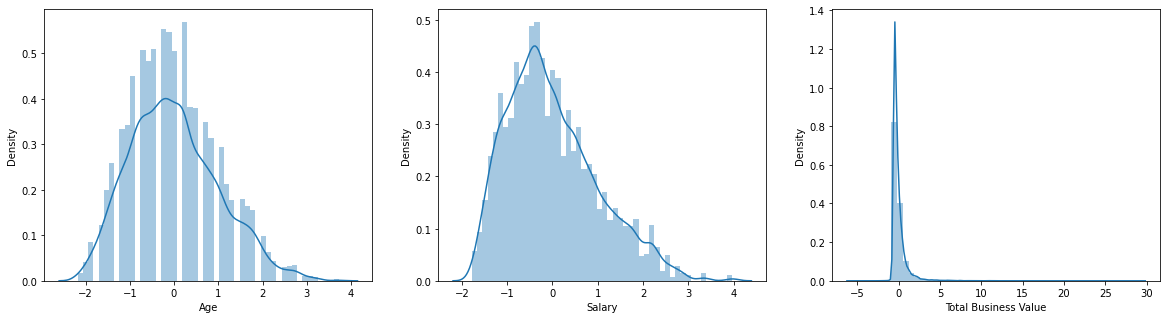

In [111]:
plt.figure(figsize=(20,5))
for i,col in enumerate(df_num.iloc[:,1:].columns):
    plt.subplot(1,3,i+1)
    sns.distplot(df_num.iloc[:,1:][col])

### Encoding categorical features with onehotencoder

In [107]:
df_char=pd.get_dummies(df_char,drop_first=True)
df_char.head()

,Gender_Male,City_C10,City_C11,City_C12,City_C13,City_C14,City_C15,City_C16,City_C17,City_C18,City_C19,City_C2,City_C20,City_C21,City_C22,City_C23,City_C24,City_C25,City_C26,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9,Education_Level_College,Education_Level_Master
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


### Concating all features to single dataframe

In [113]:
df_fin=pd.concat([df_num,df_cat,df_char],axis=1)
df_fin.head()

,Emp_ID,Age,Salary,Total Business Value,Joining Designation,Designation,Quarterly Rating,Target,Gender_Male,City_C10,City_C11,City_C12,City_C13,City_C14,City_C15,City_C16,City_C17,City_C18,City_C19,City_C2,City_C20,City_C21,City_C22,City_C23,City_C24,City_C25,City_C26,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9,Education_Level_College,Education_Level_Master
0,1,-1.061615,-0.267358,1.603674,1,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,-1.061615,-0.267358,-1.096482,1,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,-1.061615,-0.267358,-0.506666,1,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2,-0.582711,0.044122,-0.506666,2,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,2,-0.582711,0.044122,-0.506666,2,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


### Seperating out Training and Testing dataframe 

In [124]:
df_fin.shape

(19104, 39)

#### Training data

In [129]:
dftr=df_fin[~df_fin.Emp_ID.isin(test_emp)]
dftr=dftr.drop(['Emp_ID'],axis=1)
dftr.shape

(10516, 38)

#### Testing data

In [126]:
dfts=df_fin[df_fin.Emp_ID.isin(test_emp)]
dfts.shape

(8588, 39)

In [130]:
dftr.Target.value_counts()

0    6041
1    4475
Name: Target, dtype: int64

### Train test split

In [132]:
from sklearn.model_selection import train_test_split
X=dftr.drop(['Target'],axis=1)
y=dftr['Target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

## Model Building

### LogisticRegression

In [133]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(random_state=4)
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_train)
y_pred1=log_model.predict(X_test)

#### Resultsummary function

In [134]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
def results(clf,X_train,y_train,X_test,y_test):
    print('========================================================================')
    print('Train data result summary')
    print('========================================================================')
    y_pred=clf.predict(X_train)
    score=accuracy_score(y_train,y_pred)
    c_matrix=confusion_matrix(y_train,y_pred)
    c_report=classification_report(y_train,y_pred,output_dict=True)
    print('Accuracy score : ')
    print(score)
    print('Confusion matrix : ')
    display(pd.DataFrame(c_matrix))
    print('Classification report : ')
    display(pd.DataFrame(c_report))
    
    print('\n========================================================================')
    print('Test data result summary')
    print('========================================================================')
    y_pred1=clf.predict(X_test)
    score=accuracy_score(y_test,y_pred1)
    c_matrix=confusion_matrix(y_test,y_pred1)
    c_report=classification_report(y_test,y_pred1,output_dict=True)
    print('Accuracy score : ')
    print(score)
    print('Confusion matrix : ')
    display(pd.DataFrame(c_matrix))
    print('Classification report : ')
    display(pd.DataFrame(c_report))

#### Evaluation

In [135]:
results(log_model,X_train,y_train,X_test,y_test)

Train data result summary
Accuracy score : 
0.7718735140275796
Confusion matrix : 


,0,1
0,3670,1186
1,733,2823


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.833523,0.704166,0.771874,0.768844,0.778840
recall,0.755766,0.793870,0.771874,0.774818,0.771874
f1-score,0.792742,0.746332,0.771874,0.769537,0.773123
support,4856.000000,3556.000000,0.771874,8412.000000,8412.000000



Test data result summary
Accuracy score : 
0.7571292775665399
Confusion matrix : 


,0,1
0,882,303
1,208,711


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.809174,0.701183,0.757129,0.755179,0.762005
recall,0.744304,0.773667,0.757129,0.758985,0.757129
f1-score,0.775385,0.735644,0.757129,0.755514,0.758026
support,1185.000000,919.000000,0.757129,2104.000000,2104.000000


In [136]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(f1_score(y_pred,y_train))
print(f1_score(y_pred1,y_test))

0.7463317911434237
0.735644076564925


### Support Vector Machines

In [137]:
from sklearn.svm import SVC
svm_clf=SVC(C=1000,gamma=0.1,kernel='rbf')
svm_clf.fit(X_train,y_train)
y_pred=svm_clf.predict(X_train)
y_pred1=svm_clf.predict(X_test)
print(f1_score(y_pred,y_train))
print(f1_score(y_pred1,y_test))

0.8688317165752847
0.7513873473917869


#### Evalution

In [138]:
results(svm_clf,X_train,y_train,X_test,y_test)

Train data result summary
Accuracy score : 
0.8890870185449358
Confusion matrix : 


,0,1
0,4389,467
1,466,3090


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.904016,0.868710,0.889087,0.886363,0.889091
recall,0.903830,0.868954,0.889087,0.886392,0.889087
f1-score,0.903923,0.868832,0.889087,0.886378,0.889089
support,4856.000000,3556.000000,0.889087,8412.000000,8412.000000



Test data result summary
Accuracy score : 
0.7870722433460076
Confusion matrix : 


,0,1
0,979,206
1,242,677


Classification report : 


,0,1,accuracy,macro avg,weighted avg
precision,0.801802,0.766704,0.787072,0.784253,0.786472
recall,0.826160,0.736670,0.787072,0.781415,0.787072
f1-score,0.813799,0.751387,0.787072,0.782593,0.786538
support,1185.000000,919.000000,0.787072,2104.000000,2104.000000


### Resampling using SMOTE

In [139]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X,y=sm.fit_resample(X,y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [140]:
pd.concat([X_train,y_train],axis=1)[['Target']].value_counts()

Target
1         4833
0         4832
dtype: int64

#### Logistic Regressiom

In [172]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(random_state=4)
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_train)
y_pred1=log_model.predict(X_test)
print(f1_score(y_pred,y_train))
print(f1_score(y_pred1,y_test))

0.78625134264232
0.7984466019417475


#### Support Vector Machine

In [142]:
from sklearn.svm import SVC
svm_clf=SVC(C=1000,gamma=0.1,kernel='rbf')
svm_clf.fit(X_train,y_train)
y_pred=svm_clf.predict(X_train)
y_pred1=svm_clf.predict(X_test)
print(f1_score(y_pred,y_train))
print(f1_score(y_pred1,y_test))

0.8977976250888053
0.8075684380032205


### ROC Curve

0.8308781942714478

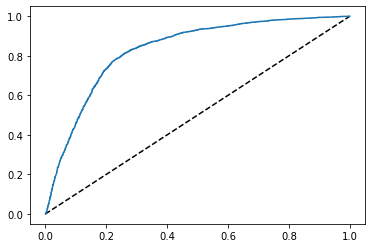

In [179]:
from sklearn.metrics import roc_curve,auc
proba=log_model.predict_proba(X_train)[:,1]
fpr, tpr, thresholds = roc_curve(y_train, proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
auc(fpr,tpr)

In [197]:
df_roc=pd.DataFrame({'fpr':fpr,'tpr':tpr,'thresholds':thresholds})
df_roc[df_roc['fpr']>0.33].head()

,fpr,tpr,thresholds
2433,0.330505,0.858266,0.452425
2434,0.330505,0.858473,0.452203
2435,0.330919,0.858473,0.451424
2436,0.330919,0.858887,0.451201
2437,0.331333,0.858887,0.451045


## Prediction for Test data 

- Dropping Emp_ID and Target features.
- Keeping only last entry for the respective Emp_ID

In [143]:
dfts1=dfts.loc[dfts['Emp_ID'].drop_duplicates(keep='last').keys()]
dfts_id=dfts1[['Emp_ID']]
dfts1=dfts1.drop(['Emp_ID','Target'],axis=1)
dfts1.head()

,Age,Salary,Total Business Value,Joining Designation,Designation,Quarterly Rating,Gender_Male,City_C10,City_C11,City_C12,City_C13,City_C14,City_C15,City_C16,City_C17,City_C18,City_C19,City_C2,City_C20,City_C21,City_C22,City_C23,City_C24,City_C25,City_C26,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9,Education_Level_College,Education_Level_Master
4,-0.582711,0.044122,-0.506666,2,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
17,-0.582711,0.422983,-0.506666,3,3,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21,-1.061615,-0.759534,-0.506666,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
53,0.694365,-1.485361,-0.506666,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
137,-0.582711,1.178279,1.277621,1,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


- Since logistic regression is not overfitted and also have decent f1_score in training data, same model is used for the predictions.
- Keeping 0.45 as thresold predictions are made.

### Predictions 

In [191]:
proba=log_model.predict_proba(dfts1)[:,1]
predictions=[0 if i<0.45 else 1 for i in proba ]
print(predictions)

[1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 

In [192]:
from collections import Counter
Counter(predictions)

Counter({1: 333, 0: 408})

In [149]:
dfts_id['Target']=predictions
dfts_id.head()

,Emp_ID,Target
4,2,1
17,6,1
21,11,1
53,14,1
137,25,0


### Merging data frame and writing to csv

In [193]:
fin_df=test_df.merge(dfts_id.reset_index(drop=True),how='left')
fin_df.head()

,Emp_ID,Target
0,394,0
1,173,0
2,1090,0
3,840,0
4,308,0


In [194]:
pred_df.to_csv('Submission.csv',index=False)